In [1]:
#-*- coding:utf-8 -*-
import jieba
import sys
import os
import pandas as pd
from string import digits
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

### 建立function --> fileinpath()
### 使用glob模組將路徑./files資料夾內所有的文本txt檔名稱讀進來
### 將這些txt檔名稱儲存到textfile這個list

In [2]:
import os
import glob
def textfile():
    files = glob.glob("./letterto shareholders1/*大同*.txt")
    return files
textfile=textfile()
textfile

['./letterto shareholders1\\2013大同致股東.txt',
 './letterto shareholders1\\2014大同致股東.txt',
 './letterto shareholders1\\2015大同致股東.txt',
 './letterto shareholders1\\2016大同致股東.txt',
 './letterto shareholders1\\2017大同致股東.txt']

### 自定義jieba字典，存檔到dict.txt

In [3]:
dictlist = ['大同股份有限公司','公允價值','財務報表','林蔚山','信用評等']
d = open('dict.txt','w+',encoding='utf8')
for i in dictlist:
    d.write(i+'\n')
d.close()
jieba.load_userdict('dict.txt')

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\USER\AppData\Local\Temp\jieba.cache
Loading model cost 3.218 seconds.
Prefix dict has been built succesfully.


### 定義停止詞與要剔除的特殊符號

In [4]:
stopwords = ['107','2017',':','2018','2035','到','為主','都','面對','／','尤其','企業','影響','機電','原物','產品','主要','同時','加上','柒萬元','同期','逐步','四年','億陸仟','六年','五年','受到','另外','貨幣','進行','三年','單位','汽車','紙業','作業','目前','公司','年度','隨著','各位','方面','台北市','萬元','濕紙','市場','本期','士林','衡量','伍拾','鋼材','馬達','仟元','台幣','拋光','稅後','萬元','馬達','107','2017',':','2018','2035','電廠','出租','內容','延伸','推出','分別','五年','行情','品牌','使用','突破','媒體','取得','兩岸','美元','生活','今年','元月','逐漸','領域','內容','成果','月份','推出','費用','取得','資訊','原料','一年','包含','春節','每桶','巴西','情資','用戶','前年','全力','建立','認證','流量','會員','去年','改版','引擎','年樂利','社群','台港澳','使用者','資安','果核','會員數','組件','群俠','玩法','儲能','企業社','人林','週年','仍須','七年','並以','單體','仍將','化生','之重','之數據','主義國家','中旬','英國','脫歐','澳洲','設備','化學產品','中油','合宜','打造','情境','到','引進','便利商店','實力','四大','天即','受惠','園區','商事','全亞洲','全民','代理','人數','事前','如鹽','上線','天堂','商圈','智通','零售','英雄','觸角','萬人','富錦街','能源管理','威肯','代收','油公司','更積','所有','節能','減碳','全產','新三輕','全銷','新營','工廠','為主','反觀','三十八','休閒','下同','七十年','新營廠','下油','下油價','都','一佰','面對','為','萬餘元','廠歲','輕裂','；','：','年','執照','四年','印度','加工品','億四仟','度','東南亞','全方位','全網','全生態','億次','酷瞧','貝果','電商','群募','樂利','新媒體','天貓','夥伴','日本','更','個體','互動式','鋼鐵產業','互動娛','豐富','影音','服務事業','之太陽能','免費','中華網','收為','家電','十一月','億萬餘元','食品','聚酯','原油','共生','華越','必須','漿價','紙張','一佰','第四季','億一仟','四佰萬元','九佰萬元','二佰萬元','來','用','了','略','目前','然而','無論','雖然','開始','超過','／','尤其','，','（','）','的','由','較','與','達','此外','致力','約','等','相關','至於','第','關於','雖','第一季','萬元','萬','這些','這樣','近','公司','發展','年度','持續','提供','發展','主要','影響','我們','大同','智冠','台紙','台苯','榮剛','未來','先生','因素','台幣','台灣','事業','市場','產品','產業','應用','成長','經濟','企業','億元','全年','可能','受到','方面','加上','以及','已經','萬噸','同時','年月日','年','月','日','其中','苯乙烯','乙苯','各項','遊戲','各位','手遊','化工','模具','支付','永續','美國','電子','服務','平台','合作','將持續','決議','紙器','甲苯','二甲苯','紙業','智慧','集團','創新','研發','多元','旗下','公噸','整合','開發','能源','廣告','技術','科技','授權','布局','紙漿','紙產線','氧化','航太產業','正式','一頁','預期','預期','三家','其年','電網','因此','智付','銷媒體','位內容','加值','玩家','因此','油氣產業','航太產業','鋼品','球場','稅後','使得','不僅','商城','吳玉堂','中國國','半導體','官學','雲端','抗菌','美洲','病毒','卡亦持續','億柒仟','不動產處','機構','內政部','冰箱','智能化','半導體','公寓','飲品','旅館','韓國','以上','街上','文青','浪潮','故事','服務據點','椰子','機械','太陽能','美術','都市','創意','失業率','市府','安全','審議','土地','位廣告','仟元','年產','減排','智能','能效','自動化','工程','基產品','工業','木漿','苛性','液體','第三季','龍井','住宅','化學品','固體','基地','平板','建案','建照','氯化','碳酸','石化','七月','仍將','機電','之家電','網路','戲產品','手機','除了','第三方','行動','除了','不同','包括','可以','智慧型','線上','裝置','軟體','油品','飛機','鋼廠','油氣','之淨現','橘子','伺服器','劉柏園','樂點','運團隊','一研','三國','之星','三成','優化','優化近','兩成','萬公噸','乙烯','一佰萬元','三佰萬元','第二季','二年','五佰萬元','及其','生產廠','膠皮','萬碼','一佰','三年','上半年','越南','別墅','華越','高爾夫','之一','别墅','打球','木片','一消','一長','三期','二期','五期','亦需','原油','大樓','汽電','油價','石化','一本初衷','一般','七月','下半年','並出','並在','節能','期以','健康','動能','機電','歡樂','樂利','之家電','數據','改版','之機','手機','娛樂','數位','之產品給','網路','今後對','戲產品','動遊戲','中華網','幹線','工具','鋼材','航空','商務','航太','高值','高值化','改版','引擎','年樂利','社群','台港澳','使用者','資安','果核','會員數','組件','群俠','玩法','儲能','企業社','人林','週年','仍須','七年','並以','單體','仍將','化生','之重','之數據','主義國家','中旬','英國','脫歐','澳洲','設備','化學產品','中油','合宜','打造','情境','到','引進','便利商店','實力','四大','天即','受惠','園區','商事','全亞洲','全民','代理','人數','事前','如鹽','上線','天堂','商圈','智通','零售','英雄','觸角','萬人','富錦街','能源管理','威肯','代收','油公司','更積','所有','節能','減碳','全產','新三輕','全銷','新營','工廠','為主','反觀','三十八','休閒','下同','七十年','新營廠','下油','下油價','都','一佰','面對','為','萬餘元','廠歲','輕裂','；','：','年','執照','四年','印度','加工品','億四仟','度','東南亞','全方位','全網','全生態','億次','酷瞧','貝果','電商','群募','樂利','新媒體','天貓','夥伴','日本','更','個體','互動式','鋼鐵產業','互動娛','豐富','影音','服務事業','之太陽能','免費','中華網','收為','家電','十一月','億萬餘元','食品','聚酯','原油','共生','華越','必須','漿價','紙張','一佰','第四季','億一仟','四佰萬元','九佰萬元','二佰萬元','來','用','了','略','目前','然而','無論','雖然','開始','超過','／','尤其','，','（','）','的','由','較','與','達','此外','致力','約','等','相關','至於','第','關於','雖','第一季','萬元','萬','這些','這樣','近','公司','發展','年度','持續','提供','發展','主要','影響','我們','大同','智冠','台紙','台苯','榮剛','未來','先生','因素','台幣','台灣','事業','市場','產品','產業','應用','成長','經濟','企業','億元','全年','可能','受到','方面','加上','以及','已經','萬噸','同時','年月日','年','月','日','其中','苯乙烯','乙苯','各項','遊戲','各位','手遊','化工','模具','支付','永續','美國','電子','服務','平台','合作','將持續','決議','紙器','甲苯','二甲苯','紙業','智慧','集團','創新','研發','多元','旗下','公噸','整合','開發','能源','廣告','技術','科技','授權','布局','紙漿','紙產線','氧化','航太產業','正式','一頁','預期','預期','三家','其年','電網','因此','智付','銷媒體','位內容','加值','玩家','因此','油氣產業','航太產業','鋼品','球場','稅後','使得','不僅','以上','太陽能','美術','位廣告','仟元','基產品','工業','木漿','苛性','液體','第三季','龍井','住宅','化學品','固體','基地','平板','建案','建照','氯化','碳酸','石化','七月','仍將','機電','之家電','網路','戲產品','手機','除了','第三方','行動','除了','不同','包括','可以','智慧型','線上','裝置','軟體','油品','飛機','鋼廠','油氣','之淨現','橘子','伺服器','劉柏園','樂點','運團隊','一研','三國','之星','三成','優化','優化近','兩成','萬公噸','乙烯','一佰萬元','三佰萬元','第二季','二年','五佰萬元','及其','生產廠','膠皮','萬碼','一佰','三年','上半年','越南','別墅','華越','高爾夫','之一','别墅','打球','木片','一消','一長','三期','二期','五期','亦需','原油','大樓','汽電','油價','石化','一本初衷','一般','七月','下半年','並出','並在','節能','期以','健康','動能','機電','歡樂','樂利','之家電','數據','改版','之機','手機','娛樂','數位','之產品給','網路','今後對','戲產品','動遊戲','中華網','幹線','工具','鋼材','航空','商務','航太','高值','高值化']
puncs = '！？｡＂＃＄％＆＇（）＊＋，－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘’‛“”„‟…‧﹏.。'

### 將textfile(list)內的文本讀取進來
### 使用jieba斷詞並加入corpus(list)之中
### 一個文本就是一個string，斷詞用空白隔開

In [5]:
# Take each line in target_txt as an unique document
# Cut each line for trarget_txt, and collect it in corpus.

corpus=[]
corpus_1=[]
jieba.load_userdict('dict.txt')
for t in textfile:
    f = open(t,'r', encoding ="utf-8")
    r = f.read()
    remove_digits = str.maketrans('', '', digits)
    r = r.translate(remove_digits)
    r_list = jieba.cut(r, cut_all=False)
    r_list = list(r_list)
    
    for i in range(40):
        #好像多刪幾次就會成功了= =
        #我重複刪5次
        #如果再出現可以再增加次數
        for w in r_list:
            if (w in stopwords) or (w in puncs) or (w < '\u4e00') or (w > '\u9fff'):
                r_list.remove(w)
    st=" ".join(r_list)
    corpus.append(st)
corpus

['致股 東報 告書 股東 女士 民國 轉型 仍 中 信心 尚未 完全 恢 復 整體 情勢 變動 仍 劇烈 經營 仍 面臨 嚴峻 挑戰 如此 執行 必要 策略 組織 體質 調整 聚焦 經營 更 有效 資源 在 也 精進 治理 獲利來 回報 股東 支持 厚 愛 一 營業 年個 體營 本業 營業 虧 損為 億 加計 營業 外淨 收支 後 稅後淨 損為 億 元 每股 淨損 元 個 體營收 億 淨損 有 大幅 改善 本 年合 併 營收 稅後淨 損億元 較前 一 合 併 營收 億 元 稅後淨 損億元 有 大幅 改善 二 及 策略 策略 方向 轉型 系統 解決 方案 之 環保 一直 是 經營 重要 理念 也 是 核心 文化 是 政 府 家庭 關切 之 重點 也 是 本 透過 對市 場與 客戶 需求 之 深入 了解 後 所欲 投入 之 故結 合本 硬體 管理 及 在 消費 本 可提 供 具備 環保 系列 產 品 在 公共 建設 領域則 管理 之 機重電 系統 解決 方案 最 優質 服 務 創造 更具 環保節 能 效益 管理 之產品 給客戶 進而 提升 之 價值 加強 擴大國際 重新 定位 全球 之 海外 分公司 區域 內 製 造 之整 併 重新分配 區域 內 之 資源 配置 以 強化 各區域 之 行銷 能力 重要 策略 調整 投資 結構 已陸續 處 分營 運不佳 投資事業 秉持 長 期經營 策略 作為 投資 指導 原則 短期 內 改善 處 於 辛苦 之 投資事業 中長 開放態度 尋求 雙贏 之 策略 於 大量 資本 支出 建構 產能 以維 競爭 之 新 投資 要 更 審慎 評估 推動 至國際 內之資 源 專注 在 管理 系統 醫療 照護 系統 未來營 收及 獲利 資產 活化 且 加速 推動 並 資產 管理 能力 以維持 長 期 之 資產 報酬 率 最 後 衷心 感謝長 來 同仁 們 對 貢獻 客戶 供應 商夥伴 及 社會 大眾 對 之 支持 認同 本 將傾盡 朝 轉型 之路 邁進 以務實 精神 達成 策略 目標 追求 營運 精進 治理 股東 創造 最大 利益 最 後 感謝 股東長 期 之 支持 鼓勵 敬祝 大家 平安 喜樂 如意',
 '致股 東報 告書 股東 女士 民國 轉型 仍 中 信心 尚未 完 全恢 復 整體 情勢 變動 仍 劇烈 經營 仍面 臨嚴 峻 挑戰 如此 執行 

### 訓練tfidf模型
### 將詞頻向量矩陣存到變數tfidf
### 將文字列表存到變數words

In [6]:
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(corpus)
words = vectorizer.get_feature_names()
print("len(words): ", len(words))

len(words):  470


In [7]:
print("tfidf.shape: ", tfidf.shape)
tfidf

tfidf.shape:  (5, 470)


<5x470 sparse matrix of type '<class 'numpy.float64'>'
	with 979 stored elements in Compressed Sparse Row format>

### 將tfidf矩陣中>0.05的詞顯示出來

In [8]:
# check each document
for i in range(len(corpus)):
    print('----Document {0}----'.format(i))
    for j in range(len(words)):
        if tfidf[i,j] > 0.05:
            print(words[j], tfidf[i,j], i ,j)   

----Document 0----
中長 0.06665620530630102 0 10
之整 0.06665620530630102 0 15
之產品 0.08261864838325861 0 16
之路 0.06665620530630102 0 17
了解 0.06665620530630102 0 20
以務實 0.06665620530630102 0 25
以維 0.06665620530630102 0 29
以維持 0.055330671705644756 0 30
供應 0.055330671705644756 0 35
信心 0.06665620530630102 0 39
優質 0.06665620530630102 0 45
內之資 0.08261864838325861 0 49
具備 0.055330671705644756 0 61
分公司 0.06665620530630102 0 65
分營 0.08261864838325861 0 66
創造 0.09309181072097952 0 75
區域 0.11066134341128951 0 83
可提 0.08261864838325861 0 91
各區域 0.06665620530630102 0 94
合本 0.06665620530630102 0 100
商夥伴 0.055330671705644756 0 107
嚴峻 0.08261864838325861 0 110
場與 0.08261864838325861 0 131
大幅 0.11066134341128951 0 135
大量 0.06665620530630102 0 139
如此 0.06665620530630102 0 146
完全 0.08261864838325861 0 147
客戶 0.09309181072097952 0 151
家庭 0.06665620530630102 0 152
審慎 0.06665620530630102 0 157
將傾盡 0.055330671705644756 0 158
尋求 0.06665620530630102 0 165
對市 0.08261864838325861 0 166
尚未 0.06665620530630102 0 170
已

創業 0.06465784671921819 3 72
創能 0.06465784671921819 3 73
加速 0.07285420599583722 3 80
努力 0.15649663084246995 3 81
區及 0.06465784671921819 3 82
及轉 0.0866042270122613 3 88
及雲端 0.06465784671921819 3 89
可行性 0.06465784671921819 3 92
各區域 0.05216554361415665 3 94
各種 0.06465784671921819 3 97
同仁 0.07285420599583722 3 101
品均 0.05216554361415665 3 104
售據點 0.06465784671921819 3 106
國際 0.05216554361415665 3 118
國際化 0.06465784671921819 3 119
團並 0.06465784671921819 3 120
團的 0.06465784671921819 3 121
團隊 0.0866042270122613 3 122
城市 0.06465784671921819 3 124
基礎 0.05216554361415665 3 127
場業務 0.05216554361415665 3 130
大幅度 0.05216554361415665 3 136
太陽 0.05216554361415665 3 140
好評 0.06465784671921819 3 144
完成 0.0866042270122613 3 148
完整 0.06465784671921819 3 149
家電產品 0.06465784671921819 3 153
實績 0.05216554361415665 3 155
履行 0.05216554361415665 3 172
已具 0.06465784671921819 3 173
已有 0.1043310872283133 3 174
市場策 0.06465784671921819 3 176
年報 0.05216554361415665 3 181
廣受 0.06465784671921819 3 184
建設領 0.064657846719

### 將tfidf矩陣用pandas套件將結果整理為DataFrame格式

In [9]:
df_tfidf = pd.DataFrame(words,columns=['words'])
for i in range(tfidf.shape[0]):
    docnumber=textfile[i]
    df_tfidf[docnumber] = pd.DataFrame(tfidf.toarray()[i].T)

df_tfidf

,words,./letterto shareholders1\2013大同致股東.txt,./letterto shareholders1\2014大同致股東.txt,./letterto shareholders1\2015大同致股東.txt,./letterto shareholders1\2016大同致股東.txt,./letterto shareholders1\2017大同致股東.txt
0,一個,0.000000,0.000000,0.000000,0.000000,0.063198
1,一生,0.000000,0.000000,0.000000,0.000000,0.063198
2,一直,0.046546,0.047554,0.043099,0.036427,0.000000
3,不懈,0.000000,0.000000,0.061721,0.052166,0.000000
4,不斷,0.000000,0.000000,0.061721,0.052166,0.000000
5,不論,0.000000,0.000000,0.000000,0.000000,0.063198
6,世界,0.000000,0.000000,0.000000,0.000000,0.063198
7,並審慎,0.000000,0.000000,0.000000,0.064658,0.000000
8,並發展,0.000000,0.000000,0.000000,0.064658,0.000000
9,並精進,0.000000,0.000000,0.000000,0.000000,0.063198


In [10]:
def chinese(w):
    if (w < '\u4e00') or (w > '\u9fff') or (w in stopwords) or (w in puncs) :
        return 0
    else:
        return 1
df_tfidf=df_tfidf[df_tfidf['words'].apply(chinese) !=0]
df_tfidf

,words,./letterto shareholders1\2013大同致股東.txt,./letterto shareholders1\2014大同致股東.txt,./letterto shareholders1\2015大同致股東.txt,./letterto shareholders1\2016大同致股東.txt,./letterto shareholders1\2017大同致股東.txt
0,一個,0.000000,0.000000,0.000000,0.000000,0.063198
1,一生,0.000000,0.000000,0.000000,0.000000,0.063198
2,一直,0.046546,0.047554,0.043099,0.036427,0.000000
3,不懈,0.000000,0.000000,0.061721,0.052166,0.000000
4,不斷,0.000000,0.000000,0.061721,0.052166,0.000000
5,不論,0.000000,0.000000,0.000000,0.000000,0.063198
6,世界,0.000000,0.000000,0.000000,0.000000,0.063198
7,並審慎,0.000000,0.000000,0.000000,0.064658,0.000000
8,並發展,0.000000,0.000000,0.000000,0.064658,0.000000
9,並精進,0.000000,0.000000,0.000000,0.000000,0.063198


### 儲存到excel --> tfidf.xlsx
### 將df_tfidf表格存到sheet -->tfidf_1

In [11]:
writer = pd.ExcelWriter('tfidf.xlsx')
df_tfidf.to_excel(writer,'tfidf_1')
writer.save()

In [12]:
tfarray=tfidf.toarray()
tfarray

array([[0.        , 0.        , 0.04654591, ..., 0.        , 0.03936823,
        0.        ],
       [0.        , 0.        , 0.04755401, ..., 0.        , 0.04022088,
        0.        ],
       [0.        , 0.        , 0.04309932, ..., 0.        , 0.03645313,
        0.06172052],
       [0.        , 0.        , 0.0364271 , ..., 0.        , 0.03080981,
        0.05216554],
       [0.06319754, 0.06319754, 0.        , ..., 0.06319754, 0.03011397,
        0.        ]])

### 使用CountVectorizer()方法
### 統計corpus之中個別文本的文字次數
### 用pandas套件將結果整理為DataFrame格式
### column-->words是所有出現的文字
### 右邊每一個column都是一個文本的文字出現次數統計

In [13]:
vec = CountVectorizer()
X = vec.fit_transform(corpus)
df = pd.DataFrame(vec.get_feature_names(),columns=['words'])
for i in range(X.shape[0]):
    docnumber='doc'+str(i+1)+'_tfdif'
    df[docnumber] = pd.DataFrame(X.toarray()[i].T)
df

,words,doc1_tfdif,doc2_tfdif,doc3_tfdif,doc4_tfdif,doc5_tfdif
0,一個,0,0,0,0,1
1,一生,0,0,0,0,1
2,一直,1,1,1,1,0
3,不懈,0,0,1,1,0
4,不斷,0,0,1,1,0
5,不論,0,0,0,0,1
6,世界,0,0,0,0,1
7,並審慎,0,0,0,1,0
8,並發展,0,0,0,1,0
9,並精進,0,0,0,0,1


In [14]:
df.head()

,words,doc1_tfdif,doc2_tfdif,doc3_tfdif,doc4_tfdif,doc5_tfdif
0,一個,0,0,0,0,1
1,一生,0,0,0,0,1
2,一直,1,1,1,1,0
3,不懈,0,0,1,1,0
4,不斷,0,0,1,1,0


### 建立chinese(w)方法，判斷輸入的w是不是在漢字區間，是 -->回傳1    不是-->回傳0
 - 使用unicode編碼剔除不是漢字的項目
 - 漢字範圍u4e00- u9fff
 
### 判斷df表格中是漢字的項目才保留下來

 - df['words'].apply(chinese)會將df表格中'words'這個column內的所有項目作為w執行chinese(w)方法，會回傳0或1
 - df['words'].apply(chinese) !=0判斷回傳不等於0的項目(漢字)
 - df[df['words'].apply(chinese) !=0]用df[...]叫出所有符合上述判斷的項目的rows 
 - 將這個結果重新儲存回df表格
 
### 這樣df表格中就只會剩下漢字的項目 

In [15]:
def chinese(w):
    if (w < '\u4e00') or (w > '\u9fff'):
        return 0
    else:
        return 1
df=df[df['words'].apply(chinese) !=0]
df

,words,doc1_tfdif,doc2_tfdif,doc3_tfdif,doc4_tfdif,doc5_tfdif
0,一個,0,0,0,0,1
1,一生,0,0,0,0,1
2,一直,1,1,1,1,0
3,不懈,0,0,1,1,0
4,不斷,0,0,1,1,0
5,不論,0,0,0,0,1
6,世界,0,0,0,0,1
7,並審慎,0,0,0,1,0
8,並發展,0,0,0,1,0
9,並精進,0,0,0,0,1


### 儲存到excel --> wordscount.xlsx
### 將df表格存到sheet -->wordscount_1

In [16]:
writer = pd.ExcelWriter('wordscount.xlsx')
df.to_excel(writer,'wordscount_1')
writer.save()

### 全部文字的dict建立文字雲

In [17]:
df['sum']=df.sum(axis=1)
wordDict=dict(zip(df['words'], df['sum']))
wordDict

{'一個': 1,
 '一生': 1,
 '一直': 4,
 '不懈': 2,
 '不斷': 2,
 '不論': 1,
 '世界': 1,
 '並審慎': 1,
 '並發展': 1,
 '並精進': 1,
 '中長': 2,
 '主管': 1,
 '之下': 1,
 '之外': 1,
 '之微': 2,
 '之整': 2,
 '之產品': 1,
 '之路': 2,
 '之長': 1,
 '也將': 1,
 '了解': 2,
 '事業外': 1,
 '人才': 1,
 '仍面': 2,
 '代表': 1,
 '以務實': 2,
 '以物': 1,
 '以積': 1,
 '以綠色': 1,
 '以維': 2,
 '以維持': 3,
 '以達成': 1,
 '作為': 6,
 '使本': 1,
 '來達成': 2,
 '供應': 3,
 '供應商': 1,
 '依集團': 1,
 '便捷': 2,
 '信心': 2,
 '做到': 2,
 '傳承': 2,
 '傾盡': 1,
 '價值': 4,
 '優良': 2,
 '優質': 2,
 '先進': 1,
 '光電': 1,
 '內之經': 1,
 '內之資': 1,
 '內之資源': 1,
 '內全': 1,
 '內外': 2,
 '全恢': 1,
 '全方': 1,
 '全球': 9,
 '全集': 1,
 '全體': 2,
 '兩平': 1,
 '公共': 5,
 '共同': 1,
 '具備': 3,
 '具有': 3,
 '兼顧': 1,
 '出台': 1,
 '分公司': 2,
 '分營': 1,
 '切入': 2,
 '初步': 1,
 '利為': 1,
 '利益': 5,
 '則以': 2,
 '創業': 1,
 '創能': 1,
 '創辦': 1,
 '創造': 6,
 '劇烈': 4,
 '加入': 1,
 '加強': 4,
 '加計': 5,
 '加速': 6,
 '努力': 5,
 '區及': 1,
 '區域': 6,
 '原則': 4,
 '原本': 1,
 '參與': 1,
 '及調': 3,
 '及轉': 4,
 '及雲端': 1,
 '受本業': 1,
 '可提': 1,
 '可行性': 1,
 '各區': 2,
 '各區域': 2,
 '各式': 1,
 '各樣': 1,
 '各種': 1,

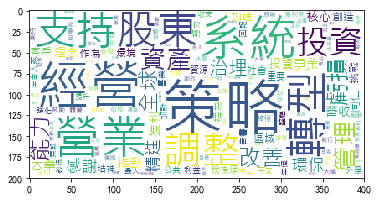

In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

font = r"C:/Users/USER/Desktop/three/msjh.ttc"
wordcloud = WordCloud(font_path = font, background_color="white")
wordcloud.fit_words(wordDict)
plt.imshow(wordcloud)

In [19]:
ten = sorted(wordDict.items(), key=lambda x: x[1],reverse = True)
ten[:30]

[('策略', 33),
 ('經營', 23),
 ('系統', 20),
 ('營業', 18),
 ('轉型', 16),
 ('支持', 14),
 ('股東', 14),
 ('調整', 14),
 ('投資', 13),
 ('資產', 13),
 ('管理', 12),
 ('虧損', 11),
 ('改善', 10),
 ('能力', 10),
 ('全球', 9),
 ('治理', 8),
 ('環保', 8),
 ('精進', 8),
 ('感謝', 7),
 ('投資事業', 7),
 ('推動', 7),
 ('本業', 7),
 ('核心', 7),
 ('營收', 7),
 ('獲利', 7),
 ('理念', 7),
 ('作為', 6),
 ('創造', 6),
 ('加速', 6),
 ('區域', 6)]

In [20]:
data = []
for t in ten[:10]:
    data.append(t[1])
label = []
for t in ten[:10]:
    label.append(t[0])

([<matplotlib.axis.XTick at 0xf227c88>,
 <a list of 10 Text xticklabel objects>)

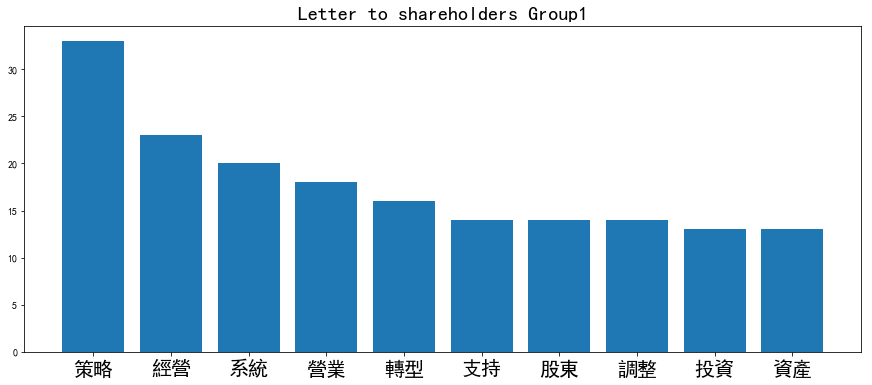

In [21]:
plt.figure(figsize=(15,6))
plt.bar(range(0,10),data)
plt.title("Letter to shareholders Group1",fontsize=20)
plt.xticks(range(0,10),label,fontsize=20)

In [22]:
from sklearn.decomposition import PCA as sklearnPCA
import matplotlib.pyplot as plt
X = tfidf.toarray()
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X)
Y_sklearn

array([[-0.37874393, -0.36194919],
       [-0.37481064, -0.34523361],
       [-0.10168828,  0.39737263],
       [-0.0191614 ,  0.55617009],
       [ 0.87440426, -0.24635991]])

No handles with labels found to put in legend.


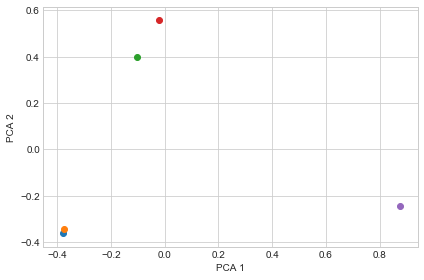

In [23]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    #for lab, col in zip(('low', 'medium', 'high'),
                        #('red', 'green','orange')):
    for i in range(len(Y_sklearn)):

        plt.scatter(Y_sklearn[i][0], Y_sklearn[i][1])
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

In [24]:
from sklearn.cluster import KMeans

In [25]:
kmeans = KMeans(n_clusters = 2)
X_clustered = kmeans.fit_predict(Y_sklearn)

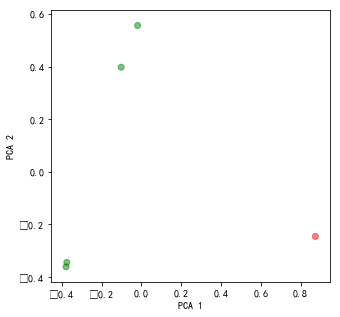

In [26]:
#Define our own color map
LABEL_COLOR_MAP = {0:'r', 1: 'g', 2: 'b', 3: 'y'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (5,5))
plt.scatter(Y_sklearn[:,0],Y_sklearn[:,1], c= label_color, alpha=0.5) 
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()